In [1]:
# -- library/testing.ipynb --
# Author: Jake Cray
# GitHub: crayjake/fgw-python
''' example usage for library '''

' example usage for library '

In [2]:
'''
from google.colab import drive
drive.mount('/content/drive')


%cd /content/drive/My Drive/fgw-python/content
#! git clone 'https://github.com/crayjake/fgw-python.git'
! git pull

import sys
sys.path.insert(0,'/content/drive/My Drive/fgw-python/content/library')
'''

"\nfrom google.colab import drive\ndrive.mount('/content/drive')\n\n\n%cd /content/drive/My Drive/fgw-python/content\n#! git clone 'https://github.com/crayjake/fgw-python.git'\n! git pull\n\nimport sys\nsys.path.insert(0,'/content/drive/My Drive/fgw-python/content/library')\n"

In [3]:
from structures import *
from generate import generate
from schemes import CrankNicolsonDeep, Simple
from converters import converter

import numpy as np

In [4]:
# define the metadata -> sets up our environment
meta = Meta(
    js=np.array(list(range(5, 6))),  # ~ 25hrs to travel 275km for mode 50
    width=540,  # 540 km  ->  270km/150ms-1 = 1800s = 30min
    depth=50,  # 50 km
    h=100,  # scale height/depth is 100 km
    time=60 * 60 * 1,  # 4 hrs
    T=60 * 60,  # 30 mins
    sponge=1 * 12 / 30,  # fraction of width to use as sponge layer
    damping=1 * 10,  # sponge damping strength
    dt=10,  # timestep is 60 secs
    saveEvery=1,  # only save every 15 mins States ->  4 per hour = 120
    spacesteps=1500,
    L=10)

# meta for when I read in the data.obj file
'''# define the metadata -> sets up our environment
meta = Meta(
    js        = np.array(list(range(1, 51))), # ~ 25hrs to travel 275km for mode 50
    width     = 540,   # 540 km  ->  270km/150ms-1 = 1800s = 30min
    depth     = 50,        # 50 km
    h         = 100,       # scale height/depth is 100 km
    time      = 60*60*30 ,   # 4 hrs
    T         = 60*60,     # 30 mins
    sponge    = 1 * 12 / 30,   # fraction of width to use as sponge layer
    damping   = 1 * 10,    # sponge damping strength
    dt        = 10,        # timestep is 60 secs
    saveEvery = 6 * 15,    # only save every 15 mins States ->  4 per hour = 120
    spacesteps= 1500,
    L = 10,
    generateData = False
)'''

Starting metadata generation
Setting up the space
Deep atmosphere!
Using a sponge layer
DEBUG: spongeStrength: 0.014690129045121951
DEBUG: spongeWidth:    108000.0
DEBUG: c_max:          158.65339368731708
Generating finite difference matrices
Generating Crank-Nicolson matrices


'# define the metadata -> sets up our environment\nmeta = Meta(\n    js        = np.array(list(range(1, 51))), # ~ 25hrs to travel 275km for mode 50\n    width     = 540,   # 540 km  ->  270km/150ms-1 = 1800s = 30min\n    depth     = 50,        # 50 km\n    h         = 100,       # scale height/depth is 100 km\n    time      = 60*60*30 ,   # 4 hrs\n    T         = 60*60,     # 30 mins\n    sponge    = 1 * 12 / 30,   # fraction of width to use as sponge layer\n    damping   = 1 * 10,    # sponge damping strength\n    dt        = 10,        # timestep is 60 secs\n    saveEvery = 6 * 15,    # only save every 15 mins States ->  4 per hour = 120\n    spacesteps= 1500,\n    L = 10,\n    generateData = False\n)'

In [5]:
# generate the data using the CrankNicolsonDeep step
# data = generate(meta=meta, step=CrankNicolsonDeep)

100%|██████████| 359/359 [00:10<00:00, 34.40it/s]


In [ ]:
import pickle

with open('data.obj', 'rb') as f:
  data = pickle.load(f)

  0%|          | 0/360 [00:00<?, ?it/s]/home/jake/Documents/fgw-python/library/animate.py:139: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  c = ax.pcolor(middleX(x, showSpongeLayer),
  0%|          | 1/360 [00:12<1:14:42, 12.49s/it]/home/jake/Documents/fgw-python/library/animate.py:139: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  c = ax.pcolor(middleX(x, showSpongeLayer),
  1%|          | 2/360 [00:25<1:14:41, 12.52s/it]/home/jake/Documents/fgw-python/lib

KeyboardInterrupt: 

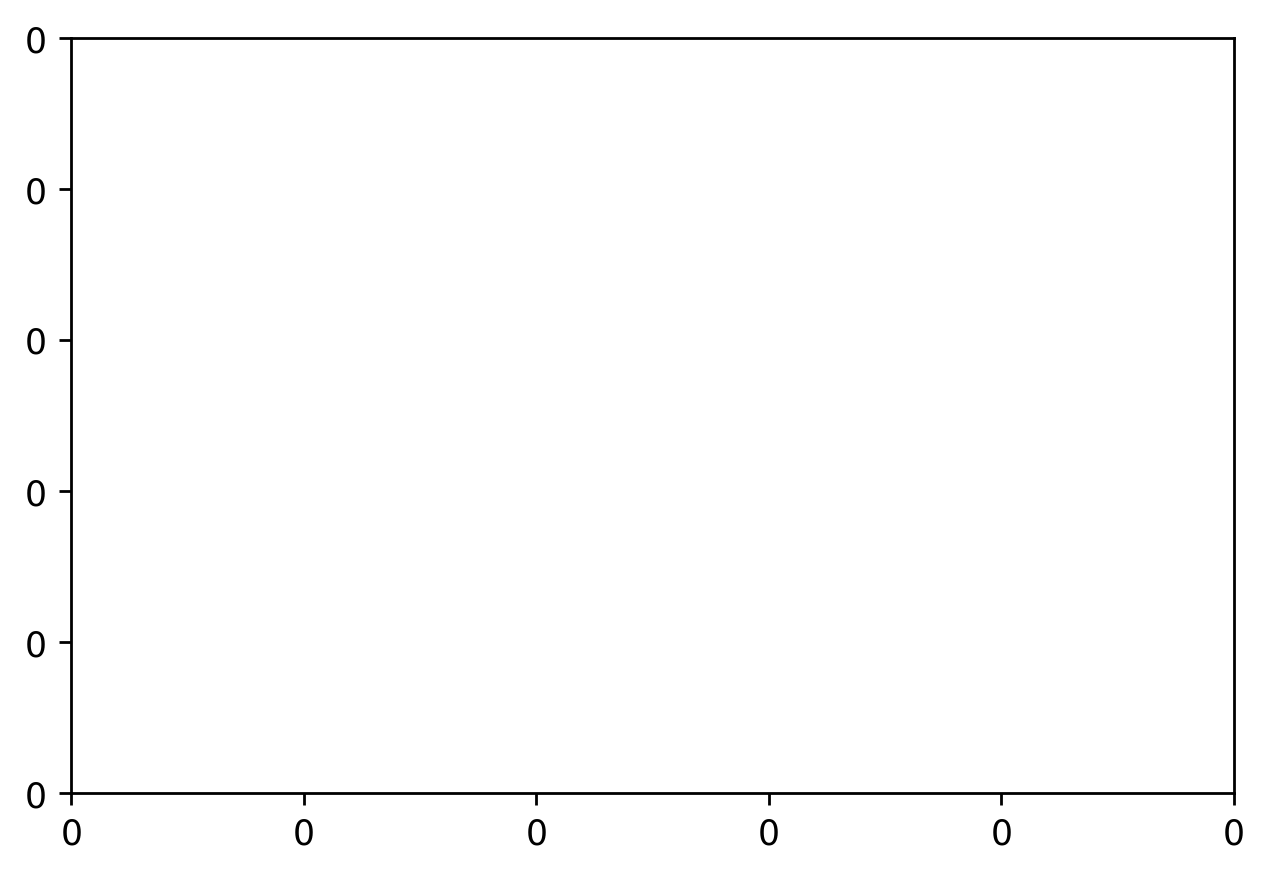

In [6]:
# so we can reload without simulating again
#import importlib
import animate
# importlib.reload(animate)

animate.animation(data,
        meta,
        converter,
        maxValue        = 0.3, # np.max(converter(data[10], meta).b
        showSpongeLayer = True,
        showStreamPlot  = False,
        cmapDivisions   = 25,
        directory       = 'test',
        skip            = 1)


In [ ]:
import subprocess

output = '../data'
framerate = 4

file = output
if not output.__contains__('.gif'):
    file = f'{output}/run.gif'

input = '../data/test'
        
subprocess.run([f'echo Y | ffmpeg -framerate {framerate} -start_number 0 -i {input}/%d.jpg -vf "scale=-2:512" -pix_fmt yuv420p {file}'], shell=True, stdout=subprocess.DEVNULL, stderr=subprocess.DEVNULL)